/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


       Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  FerienSH  Feiertag  Wochentag Jahreszeit  \
0                 14.0        58.0       1.0       1.0     Sunday     Winter   
1                 12.0         NaN       1.0       0.0     Monday     Winter   
2                 18.0        63.0       1.0       0.0    Tuesday     Winter   
3                 19.0        80.0       1.0       0.0  Wednesday     Winter   
4                 23.0        80.0       1.0       0.0   Thursday     Winter   

   asTemp   logWind  log1pTemp  
0     NaN  2.639057   2.381858  
1     Na

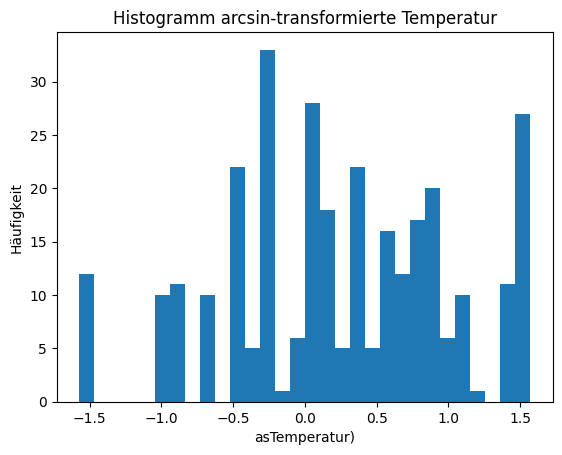

/home/codespace/.local/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/codespace/.local/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


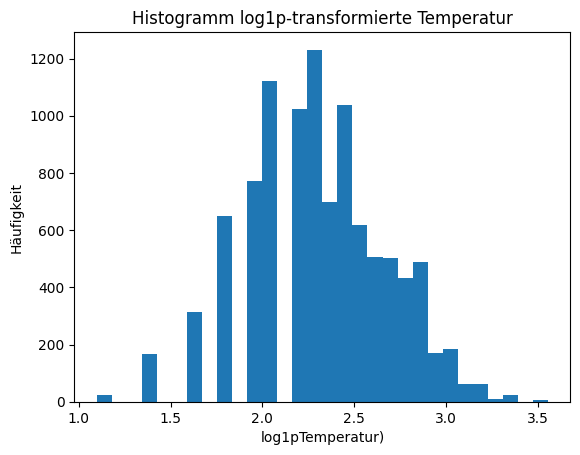

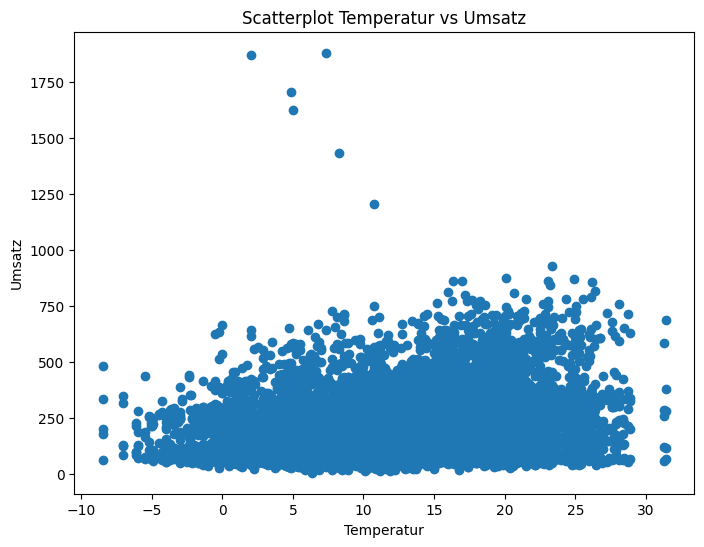

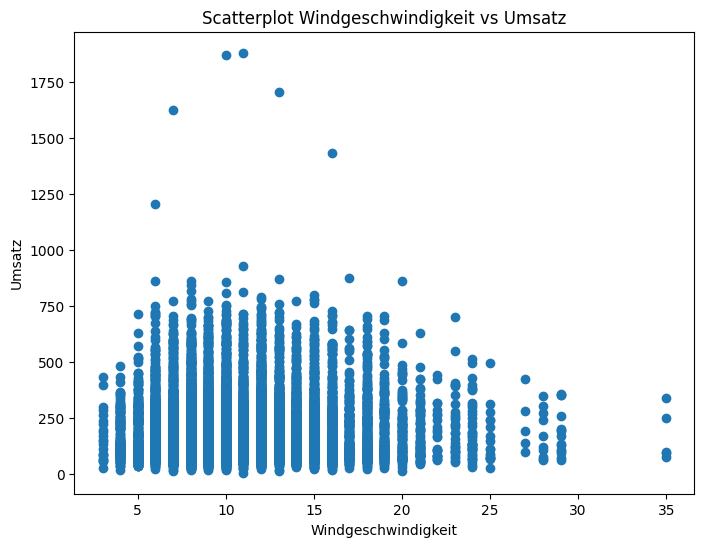

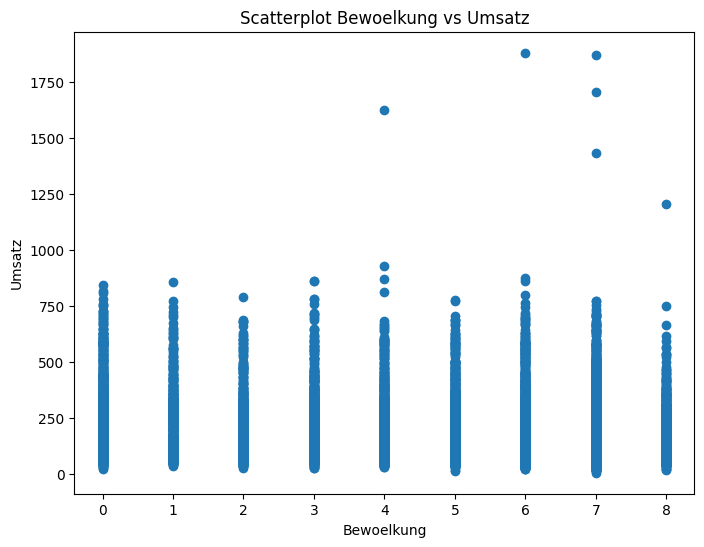

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     602.8
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        10:10:38   Log-Likelihood:                -54330.
No. Observations:                9318   AIC:                         1.087e+05
Df Residuals:                    9285   BIC:                         1.090e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from scipy import stats


## Zusammenführen der drei Datensätze in einem Dataframe
# Pfade zuteilen
pfad_1 = 'kiwo.csv'
pfad_2 = 'umsatzdaten_gekuerzt.csv'
pfad_3 = 'wetter.csv'
pfad_4 = 'fuf.csv'

# Einlesen der CSVs
daten_1 = pd.read_csv(pfad_1, usecols=['Datum', 'KielerWoche'])
daten_2 = pd.read_csv(pfad_2, usecols=['Datum', 'Warengruppe', 'Umsatz'])
daten_3 = pd.read_csv(pfad_3, usecols=['Datum', 'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'Wettercode'])
daten_4 = pd.read_csv(pfad_4, usecols=['Datum', 'FerienSH', 'Feiertag'])

# Zusammenführen der df
# Datensätze zusammenführen mit Outer Join
merged_df = pd.merge(daten_1, daten_2, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_3, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_4, how='outer', on='Datum')

# Konvertieren der 'Datum' Spalte in ein datetime-Objekt
merged_df['Datum'] = pd.to_datetime(merged_df['Datum'], format='%Y-%m-%d')

# Hinzufügen der Wochentag-Spalte
merged_df['Wochentag'] = merged_df['Datum'].dt.day_name()

# Funktion zur Bestimmung der Jahreszeit
def get_season(date):
    if date.month in [3, 4, 5]:
        return 'Frühling'
    elif date.month in [6, 7, 8]:
        return 'Sommer'
    elif date.month in [9, 10, 11]:
        return 'Herbst'
    else:
        return 'Winter'

# Hinzufügen der Jahreszeit-Spalte
merged_df['Jahreszeit'] = merged_df['Datum'].apply(get_season)

# Transformieren der Variablen
merged_df['asTemp'] = np.arcsin(merged_df['Temperatur'])
merged_df['logWind'] = np.log(merged_df['Windgeschwindigkeit'])
merged_df['log1pTemp'] = np.log1p(merged_df['Temperatur'])



# Anzeigen der ersten Zeilen des DataFrame
print(merged_df.head())

# Anzeigen der Information des DataFrame
print(merged_df.info())

# Anzeigen der Beschreibung des DataFrame
print(merged_df.describe())

# Wertverteilungen anzeigen
print(merged_df['KielerWoche'].value_counts())
print(merged_df['Warengruppe'].value_counts())
print(merged_df['Windgeschwindigkeit'].value_counts())
print(merged_df['FerienSH'].value_counts())
print(merged_df['Feiertag'].value_counts())
print(merged_df['Wettercode'].value_counts())
print(merged_df['Jahreszeit'].value_counts())

# Histogramme für die transformierten Variablen
#asTemp
# Histogramm für asTemp
plt.hist(merged_df['asTemp'].dropna(), bins=30)
plt.title('Histogramm arcsin-transformierte Temperatur')
plt.xlabel('asTemperatur)')
plt.ylabel('Häufigkeit')
plt.show()


# logWind
plt.hist(merged_df['logWind'].dropna(), bins=30)

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Logarithmisch-Transformierte Windgeschwindigkeit')
plt.xlabel('Log(Windgeschwindigkeit)')
plt.ylabel('Häufigkeit')

#log1pTemp
# Histogramm für asTemp
plt.hist(merged_df['log1pTemp'].dropna(), bins=np.linspace(merged_df['log1pTemp'].min(), merged_df['log1pTemp'].max(), 30))
plt.title('Histogramm log1p-transformierte Temperatur')
plt.xlabel('log1pTemperatur)')
plt.ylabel('Häufigkeit')
plt.show()

# Anzeigen des Histogramms
plt.show()

# Scatterplots
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Temperatur'], merged_df['Umsatz'], label='Daten')
plt.xlabel('Temperatur')
plt.ylabel('Umsatz')
plt.title('Scatterplot Temperatur vs Umsatz')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Windgeschwindigkeit'], merged_df['Umsatz'], label='Daten')
plt.xlabel('Windgeschwindigkeit')
plt.ylabel('Umsatz')
plt.title('Scatterplot Windgeschwindigkeit vs Umsatz')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Bewoelkung'], merged_df['Umsatz'], label='Daten')
plt.xlabel('Bewoelkung')
plt.ylabel('Umsatz')
plt.title('Scatterplot Bewoelkung vs Umsatz')
plt.show()

# Lineares Modell
mod = smf.ols('Umsatz ~ C(Warengruppe) + C(Windgeschwindigkeit) + C(FerienSH)', data=merged_df).fit()

# Zusammenfassung des Modells
print(mod.summary())
